# Prepping the Data

In [4]:
import pysr
from pysr import PySRRegressor

import xarray as xr
import netCDF4 as nc
#import h5netcdf

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from glob import glob

In [7]:
folder_path = '/home/laurapong321/leap_24/les_sim_2'

In [9]:
def read_data(filepath):
    """
    Reads in each dataset and returns an xarray dataset
    """

    ds_thm = xr.open_dataset(f"{filepath}",
                             decode_times=False, group="thermo")
    ds_bud = xr.open_dataset(f"{filepath}",
                            decode_times=False, group="budget")
    ds_def = xr.open_dataset(f"{filepath}", 
                             decode_times=False, group="default")
    return xr.merge([ds_thm, ds_bud, ds_def], join="inner")

In [ ]:
def p_subset(filepath, variables):
    """
    reads in and subsets
     data set for desired variables
    """

    

In [20]:
files

['/home/laurapong321/leap_24/les_sim_2/Ug16Q000_IV.nc',
 '/home/laurapong321/leap_24/les_sim_2/Ug16Q001_IV.nc',
 '/home/laurapong321/leap_24/les_sim_2/Ug16Q003_IV.nc',
 '/home/laurapong321/leap_24/les_sim_2/Ug16Q006_I.nc',
 '/home/laurapong321/leap_24/les_sim_2/Ug16Q006_IV.nc',
 '/home/laurapong321/leap_24/les_sim_2/Ug16Q010_IV.nc',
 '/home/laurapong321/leap_24/les_sim_2/Ug1Q01_II.nc',
 '/home/laurapong321/leap_24/les_sim_2/Ug2Q010_I.nc',
 '/home/laurapong321/leap_24/les_sim_2/Ug2Q010_IV.nc',
 '/home/laurapong321/leap_24/les_sim_2/Ug2Q01_III.nc',
 '/home/laurapong321/leap_24/les_sim_2/Ug2Q024_I.nc',
 '/home/laurapong321/leap_24/les_sim_2/Ug8Q003_III.nc',
 '/home/laurapong321/leap_24/les_sim_2/Ug8Q003_II.nc',
 '/home/laurapong321/leap_24/les_sim_2/Ug8Q003_IV.nc',
 '/home/laurapong321/leap_24/les_sim_2/Ug8Q006_IV.nc']

In [17]:
#opening data
folder_path = '/home/laurapong321/leap_24/les_sim_2'

files = glob(f"{folder_path}/*")

iv16_1 = read_data(files[1])
iv16_3 = read_data(files[2])
i16_6 = read_data(files[3])
iv16_6 = read_data(files[4])
iv16_10 = read_data(files[5])
ii10_1 = read_data(files[6])
i2_20 = read_data(files[7])
iv2_10 = read_data(files[8])
iii2_1 = read_data(files[9])
i2_24 = read_data(files[10])
iii8_3 = read_data(files[11])
ii8_3 = read_data(files[12])
iv8_3 = read_data(files[13])
iv8_6 = read_data(files[14])

# Plots Instructions

### Generate the following plots for data analysis:
 1. Time vs. PBL (Planetary Boundary Layer) height: This plot helps visualize how the boundary layer height varies over time.
 2. Theta vs. Height: Plot Theta (potential temperature) against height to analyze temperature profiles in the atmosphere.
 3. Theta Flux vs. Height: Show how Theta flux (turbulent heat flux) varies with height.

For the plots involving height (Theta vs. Height, Theta Flux vs. Height), consider plotting several time steps.
This approach will illustrate how the profiles evolve with time, providing insights into dynamic changes in the atmosphere.

In [64]:
# weak inversion, ug=8, q=006
iv8_6_plot_var = iv8_6[["zi", "th", "th_flux"]]

Text(0.5, 1.0, 'Plot 1: Time vs PBL')

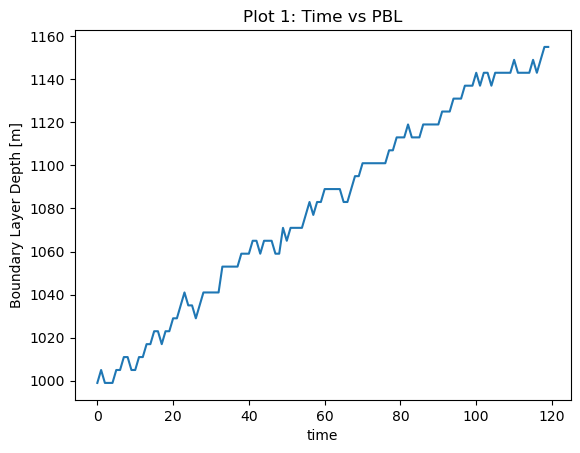

In [27]:
iv8_6_plot_var.zi.plot()
plt.title("Plot 1: Time vs PBL")

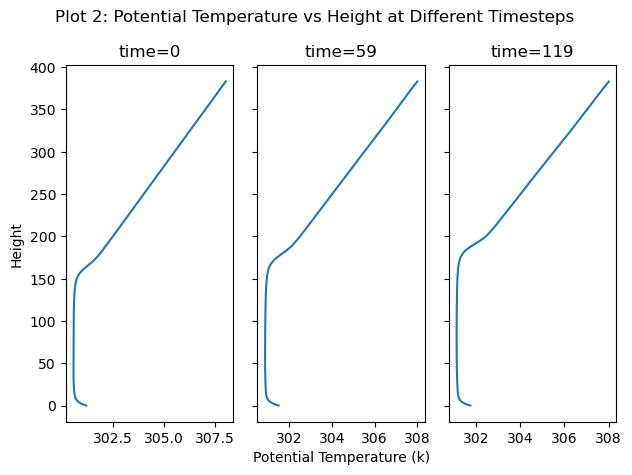

In [76]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

fig.suptitle('Plot 2: Potential Temperature vs Height at Different Timesteps')

ax1.plot(iv8_6_plot_var.th.sel(time=0), iv8_6_plot_var.z)
ax1.set_title(f"time=0")
ax1.set_ylabel("Height")

ax2.plot(iv8_6_plot_var.th.sel(time=59), iv8_6_plot_var.z)
ax2.set_title(f"time=59")
ax2.set_xlabel("Potential Temperature (k)")

ax3.plot(iv8_6_plot_var.th.sel(time=119), iv8_6_plot_var.z)
ax3.set_title(f"time=119")

plt.tight_layout()


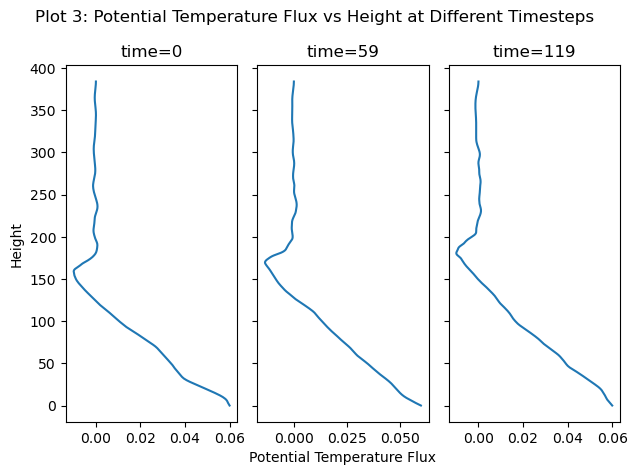

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

fig.suptitle('Plot 3: Potential Temperature Flux vs Height at Different Timesteps')

ax1.plot(iv8_6_plot_var.th_flux.sel(time=0), iv8_6_plot_var.zh)
ax1.set_title(f"time=0")
ax1.set_ylabel("Height")

ax2.plot(iv8_6_plot_var.th_flux.sel(time=59), iv8_6_plot_var.zh)
ax2.set_title(f"time=59")
ax2.set_xlabel("Potential Temperature Flux")

ax3.plot(iv8_6_plot_var.th_flux.sel(time=119), iv8_6_plot_var.zh)
ax3.set_title(f"time=119")

plt.tight_layout()


# Impact of Large-Scale Conditions on Variables

### Overview:
#### Our simulations incorporate three main large-scale variables:
 1. Surface Heating (Q): Influences the heat profile.
 2. Wind (ug): Affects the movement and distribution of air properties.
 3. Inversion (dtheta/dz): Impacts the stratification and stability, influencing PBL growth.

### Objective:
 Analyze how different combinations of these large-scale variables affect the profiles of heat, heat flux, and the growth of the PBL.

### Instructions for Plotting:
 Repeat the plotting process for multiple simulations to compare results. For each variable (heat, heat flux, PBL growth), plot the profiles from several simulations in the same figure. This visualization will help in understanding the differential impacts of Q, ug, and dtheta/dz on the simulated conditions.

 This comparative approach will provide deeper insights into the effects of large-scale atmospheric conditions on local environmental dynamics.


In [68]:
### subsetting data ###



## to compare the effects of inversion

# weak inversion, ug=8, q=003
iv8_3_plot_var = iv8_3[["zi", "th", "th_flux"]]

# strong-medium inversion, ug=8, q=003
ii8_3_plot_var = ii8_3[["zi", "th", "th_flux"]]

# weak-medium inversion, ug=8, q=003
iii8_3_plot_var = iii8_3[["zi", "th", "th_flux"]]


## to compare the effects of q

# weak inversion, ug=16, q=001
iv16_1_plot_var = iv16_1[["zi", "th", "th_flux"]]

# weak inversion, ug=16, q=003
iv16_3_plot_var = iv16_3[["zi", "th", "th_flux"]]


## to compare the effects of ug, compare 
# iv16_3_plot_var and iv8_3_plot_var

## Comparing simulations: Time vs PBL

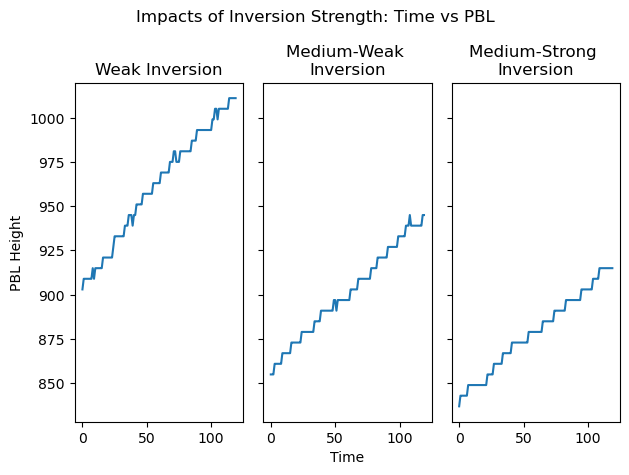

In [86]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

fig.suptitle('Impacts of Inversion Strength: Time vs PBL')

ax1.plot(iv8_3_plot_var.zi)
ax1.set_title(f"Weak Inversion")
ax1.set_ylabel("PBL Height")

ax2.plot(iii8_3_plot_var.zi)
ax2.set_title(f"Medium-Weak \nInversion")
ax2.set_xlabel("Time")

ax3.plot(ii8_3_plot_var.zi)
ax3.set_title(f"Medium-Strong \nInversion")

plt.tight_layout()

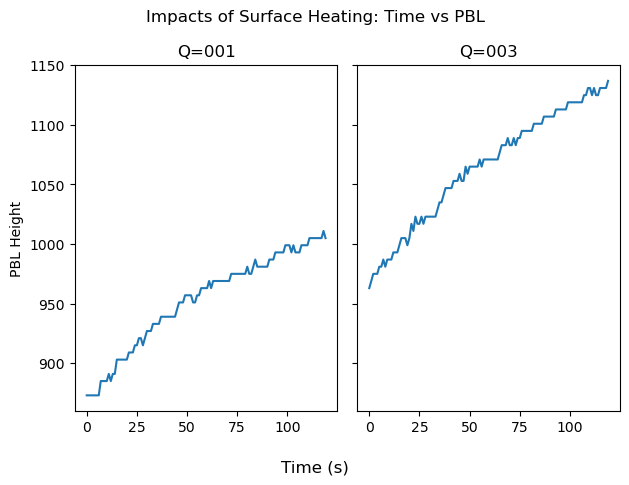

In [83]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

fig.suptitle('Impacts of Surface Heating: Time vs PBL')

ax1.plot(iv16_1_plot_var.zi)
ax1.set_title(f"Q=001")
ax1.set_ylabel("PBL Height")

ax2.plot(iv16_3_plot_var.zi)
ax2.set_title(f"Q=003")

fig.supxlabel("Time (s)")
plt.tight_layout()


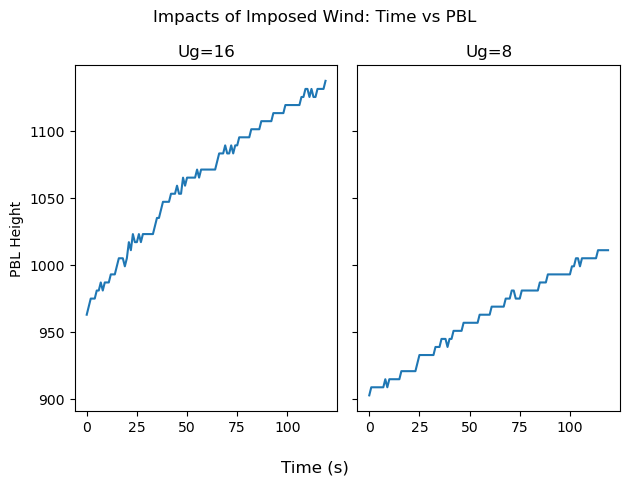

In [84]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

fig.suptitle('Impacts of Imposed Wind: Time vs PBL')

ax1.plot(iv16_3_plot_var.zi)
ax1.set_title(f"Ug=16")
ax1.set_ylabel("PBL Height")

ax2.plot(iv8_3_plot_var.zi)
ax2.set_title(f"Ug=8")

fig.supxlabel("Time (s)")
plt.tight_layout()


## Comparing Simulations: Potential Temperature vs Height (at time=100)

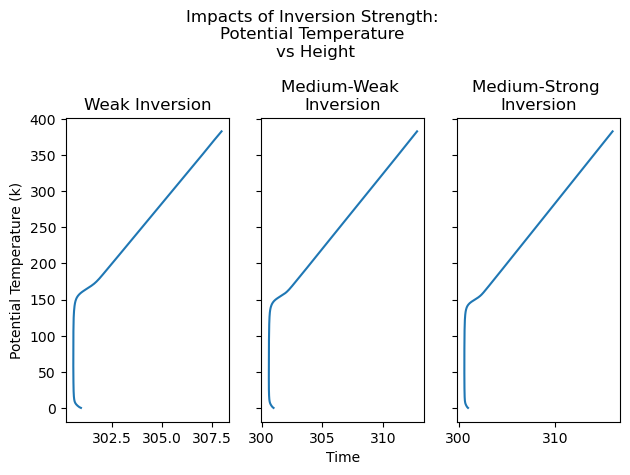

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

fig.suptitle('Impacts of Inversion Strength: \nPotential Temperature \nvs Height')

ax1.plot(iv8_3_plot_var.th.sel(time=100), range(len(iv8_3_plot_var.th.sel(time=100))))
ax1.set_title(f"Weak Inversion")
ax1.set_ylabel("Potential Temperature (k)")

ax2.plot(iii8_3_plot_var.th.sel(time=100), range(len(iii8_3_plot_var.th.sel(time=100))))
ax2.set_title(f"Medium-Weak \nInversion")
ax2.set_xlabel("Time")

ax3.plot(ii8_3_plot_var.th.sel(time=100), range(len(ii8_3_plot_var.th.sel(time=100))))
ax3.set_title(f"Medium-Strong \nInversion")

plt.tight_layout()